In [1]:
print("hello world!")

hello world!


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

import tkinter as tk
from tkinter import *
from tkinter.ttk import * 
from tkinter import filedialog
from PIL import ImageDraw, ImageTk
from PIL import Image

from shutil import copyfile
import os




root = tk.Tk()
frame = tk.Frame(root)
frame2 = tk.Frame(root)
nextbackframe = tk.Frame(frame, bg='black')
frame.pack()
bs = 64 #batch size use if slow gpu
path = untar_data(r'C:\Users\Bhushan\Desktop\DJ\seg_train\seg_train') #scene data path Default!!
tfms = get_transforms(do_flip=True, max_rotate=0, max_zoom=0, max_warp=0) 
data = (ImageList.from_folder(path).random_split_by_pct().label_from_folder().transform(tfms,size=(150,150)).databunch())
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
model_name='scene-res34-model1'
addVar=[]
test_image_path=()
ImgNumber=0
sliderimagetype='upload'

try:
    learn.load(model_name)
except:
    print("An exception occurred")

epoch=1

def NextImg():
    global ImgNumber, test_image_path
    if(sliderimagetype=='upload'):
        ImgNumber=(ImgNumber+1)%len(test_image_path)
        print(ImgNumber)
        src=r'{}'.format(test_image_path[ImgNumber])
        img = ImageTk.PhotoImage(Image.open(src).resize((350,350), Image.ANTIALIAS))
        l.config(image=img)
        l.photo=img
    elif(sliderimagetype=='classified'):
        ImgNumber=(ImgNumber+1)%len(test_image_path)
        print(ImgNumber)
        src=r'{}'.format(addVar[ImgNumber][0])
        img = ImageTk.PhotoImage(Image.open(src).resize((350,350), Image.ANTIALIAS))
        l.config(image=img)
        l.photo=img
        
        imgLabel.delete('1.0', END)
        imgLabel.insert(END, addVar[ImgNumber][1])

def PrevImg():
    global ImgNumber, test_image_path
    if(sliderimagetype=='upload'):
        ImgNumber=(ImgNumber-1)%len(test_image_path)
        print(ImgNumber)
        src=r'{}'.format(test_image_path[ImgNumber])
        img = ImageTk.PhotoImage(Image.open(src).resize((350,350), Image.ANTIALIAS))
        l.config(image=img)
        l.photo=img
    elif(sliderimagetype=='classified'):
        ImgNumber=(ImgNumber-1)%len(test_image_path)
        print(ImgNumber)
        src=r'{}'.format(addVar[ImgNumber][0])
        img = ImageTk.PhotoImage(Image.open(src).resize((350,350), Image.ANTIALIAS))
        l.config(image=img)
        l.photo=img
        
        imgLabel.delete('1.0', END)
        imgLabel.insert(END, addVar[ImgNumber][1])


def Upload():
    global test_image_path, ImgCycle,sliderimagetype
    test_image_path=()
    test_image_path = filedialog.askopenfilenames()
    print(test_image_path)
    ImgNumber=0
    src=r'{}'.format(test_image_path[0])
    img = ImageTk.PhotoImage(Image.open(src).resize((350,350), Image.ANTIALIAS))
    l.config(image=img)
    l.photo=img
    sliderimagetype='upload'
    Terminal1.config(state=NORMAL)
    Terminal1.delete('1.0', END)
    Terminal1.insert(END, 'Uploaded!')
    Terminal1.config(state=DISABLED)


def Classify():
    global addVar,sliderimagetype
    addVar=[]
    for i in test_image_path:
        temp_path=r'{}'.format(i)
        img = open_image(temp_path).resize(150)
        arr=learn.predict(img)
        addVar.append([i,str(arr[0])])
        print(addVar)
    sliderimagetype='classified'
    ImgNumber=0
    src=r'{}'.format(addVar[0][0])
    img = ImageTk.PhotoImage(Image.open(src).resize((350,350), Image.ANTIALIAS))
    l.config(image=img)
    l.photo=img
 
    imgLabel.delete('1.0', END)
    imgLabel.insert(END, addVar[0][1])
    Terminal1.config(state=NORMAL)
    Terminal1.delete('1.0', END)
    Terminal1.insert(END, 'Success!')
    Terminal1.config(state=DISABLED)
        
def Addandtrain():
    global addVar
    for i in addVar:
#         src= r'{}'.format(i[0])
#         dst = 'C:\\Users\\Bhushan\\Desktop\\DJ\\tryfolder\\'+i[1]
#         dst= r'{}'.format(dst)
#         shutil.copy2(src, dst)
        src= r'{}'.format(i[0])
        dst = 'C:/Users/Bhushan/Desktop/DJ/tryfolder/'+i[1]
        dst= r'{}'.format(dst)
        print(src,dst)
        shutil.copy2(src, dst)
        Terminal1.config(state=NORMAL)
        Terminal1.delete('1.0', END)
        Terminal1.insert(END, 'Data Added!')
        Terminal1.config(state=DISABLED)
    #C:\Users\Bhushan\Desktop\DJ\tryfolder

def Advance():
    frame.pack_forget()
    frame2.pack()

def Train():
    Terminal2.config(state=NORMAL)
    Terminal2.delete('1.0', END)
    Terminal2.insert(END, 'Training please wait...')
    Terminal2.config(state=DISABLED)
    print(epoch)
    learn.fit_one_cycle(epoch)
    Terminal2.config(state=NORMAL)
    Terminal2.delete('1.0', END)
    Terminal2.insert(END, 'Trained!')
    Terminal2.config(state=DISABLED)

def SaveModel():
    learn.save(model_name, return_path=True)
    Terminal2.config(state=NORMAL)
    Terminal2.delete('1.0', END)
    Terminal2.insert(END, 'Saved!')
    Terminal2.config(state=DISABLED)

def SetLR():
    inputText= TextBox.get('1.0', END)
    learn.unfreeze()
    temp = (float(inputText))
    learn.fit_one_cycle(1,temp)
    Terminal2.config(state=NORMAL)
    Terminal2.delete('1.0', END)
    Terminal2.insert(END, 'LR Set:'+inputText)
    Terminal2.config(state=DISABLED)
    
def Epochs():
    inputText= TextBoxEpoch.get('1.0', END)
    global epoch
    epoch = int(inputText)
    print(epoch)
    Terminal2.config(state=NORMAL)
    Terminal2.delete('1.0', END)
    Terminal2.insert(END, 'Epoch Set!')
    Terminal2.config(state=DISABLED)

def NewData():
    global bs, path, tfms, data, learn
    folder_selected = filedialog.askdirectory()
    print(folder_selected)
    bs = 64 #batch size use if slow gpu
    src=r"C:\Users\Bhushan\Desktop\fastai\course-v3\nbs\dl1\images\rice"
    print(src)
    path = untar_data(src) #New data path!!!!
    tfms = get_transforms(do_flip=True, max_rotate=0, max_zoom=0, max_warp=0)
    data = (ImageList.from_folder(path).random_split_by_pct().label_from_folder().transform(tfms,size=(150,150)).databunch())
    learn = cnn_learner(data, models.resnet34, metrics=accuracy)
    Terminal2.config(state=NORMAL)
    Terminal2.delete('1.0', END)
    Terminal2.insert(END, 'New Data, Please Train*')
    Terminal2.config(state=DISABLED)

def Resnet50():
    global learn, model_name
    learn = cnn_learner(data, models.resnet50, metrics=accuracy)
    model_name='scene-resnet50-model1'
    try:
        learn.load(model_name)
        Terminal2.config(state=NORMAL)
        Terminal2.delete('1.0', END)
        Terminal2.insert(END, 'Resnet50 loaded!')
        Terminal2.config(state=DISABLED)
    except:
        print("An exception occurred")
    
    
def Densenet121():
    global learn, model_name
    learn = cnn_learner(data, models.densenet121, metrics=accuracy)
    model_name='scene-densenet121-model1'
    try:
        learn.load(model_name)
        Terminal2.config(state=NORMAL)
        Terminal2.delete('1.0', END)
        Terminal2.insert(END, 'Densenest121 loaded!')
        Terminal2.config(state=DISABLED)
    except:
        print("An exception occurred")
    
def Vgg16():
    global learn, model_name
    learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy)
    model_name='scene-vgg16-model1'
    try:
        learn.load(model_name)
        Terminal2.config(state=NORMAL)
        Terminal2.delete('1.0', END)
        Terminal2.insert(END, 'Vgg16 loaded!')
        Terminal2.config(state=DISABLED)
    except:
        print("An exception occurred")

    
def Resnet34():
    global learn, model_name
    learn = cnn_learner(data, models.resnet34, metrics=accuracy)
    model_name='scene-res34-model1'
    try:
        learn.load(model_name)
        Terminal2.config(state=NORMAL)
        Terminal2.delete('1.0', END)
        Terminal2.insert(END, 'Resnet34 loaded!')
        Terminal2.config(state=DISABLED)
    except:
        print("An exception occurred")
    
def GoBack():
    frame2.pack_forget()
    frame.pack()
    

Terminal1= tk.Text(frame,width=32, height=1, font=('Helvetica', '15', 'bold'))
Terminal1.pack(side=tk.TOP)
Terminal1.config(state=NORMAL)
Terminal1.delete('1.0', END)
Terminal1.insert(END, 'Terminal')
Terminal1.config(state=DISABLED)
#Terminal1.config(state=NORMAL)

Terminal2= tk.Text(frame2,width=32, height=1, font=('Helvetica', '15', 'bold'))
Terminal2.pack(side=tk.TOP)
Terminal2.config(state=NORMAL)
Terminal2.delete('1.0', END)
Terminal2.insert(END, 'Terminal')
Terminal2.config(state=DISABLED)

img = ImageTk.PhotoImage(Image.open(r"C:\Users\Bhushan\Desktop\DJ\bhushan.jpg").resize((350,350), Image.ANTIALIAS))
l=Label(frame,image=img)
l.pack(side=tk.TOP)

imgLabel= tk.Text(frame,width=32, height=1, font=('Helvetica', '15', 'bold'))
imgLabel.pack(side=tk.TOP)
imgLabel.insert(END, 'Class Name')

nextbackframe.pack(side=tk.TOP)
NextImg = tk.Button(nextbackframe,width=14, height=2, font=('Helvetica', '15', 'bold'),
                   text="Next", bg='black', command=NextImg,
                   fg="white")
NextImg.pack(side=tk.RIGHT)
PrevImg = tk.Button(nextbackframe,width=14, height=2, font=('Helvetica', '15', 'bold'),
                   text="Previous", bg='black', command=PrevImg,
                   fg="white")
PrevImg.pack(side=tk.LEFT)


    
Upload = tk.Button(frame,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Upload", bg='black', command=Upload,
                   fg="white")
Upload.pack(side=tk.TOP)

Classify = tk.Button(frame,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Classify", bg='black', command=Classify,
                   fg="white")
Classify.pack(side=tk.TOP)

Addandtrain = tk.Button(frame,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Add and Train", bg='black', command=Addandtrain,
                   fg="white")
Addandtrain.pack(side=tk.TOP)

Advance = tk.Button(frame,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Advance", bg='black', command=Advance,
                   fg="white")
Advance.pack(side=tk.TOP)
        
Train = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Train Model", bg='black', command=Train,
                    fg='white')
Train.pack(side=tk.TOP)

SaveModel = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Save Model", bg='black', command=SaveModel,
                    fg='white')
SaveModel.pack(side=tk.TOP)

TextBox= tk.Text(frame2,width=32, height=1, font=('Helvetica', '15', 'bold'))
TextBox.pack(side=tk.TOP)

SetLR = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Set LR and Train", bg='black', command=SetLR,
                    fg='white')
SetLR.pack(side=tk.TOP)

TextBoxEpoch= tk.Text(frame2,width=32, height=1, font=('Helvetica', '15', 'bold'))
TextBoxEpoch.pack(side=tk.TOP)

Epochs = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Epochs", bg='black', command=Epochs,
                    fg='white')
Epochs.pack(side=tk.TOP)

NewData = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="New Data", bg='black', command=NewData,
                    fg='white')
NewData.pack(side=tk.TOP)

Resnet50 = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Resnet50", bg='black', command=Resnet50,
                    fg='white')
Resnet50.pack(side=tk.TOP)

Vgg16 = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Vgg16", bg='black', command=Vgg16,
                    fg='white')
Vgg16.pack(side=tk.TOP)

Densenet121 = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Densenet", bg='black', command=Densenet121,
                    fg='white')
Densenet121.pack(side=tk.TOP)


Resnet34 = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Resnet34", bg='black', command=Resnet34,
                    fg='white')
Resnet34.pack(side=tk.TOP)

GoBack = tk.Button(frame2,width=29, height=2, font=('Helvetica', '15', 'bold'),
                   text="Back", bg='black', command=GoBack,
                   fg="white")
GoBack.pack(side=tk.TOP)

frame.config(bg='white')
root.mainloop()

C:\Users\Bhushan\Anaconda3\envs\keras-gpu\lib\site-packages\fastai\data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


C:/Users/Bhushan/Desktop/fastai/course-v3/nbs/dl1/images/rice
C:\Users\Bhushan\Desktop\fastai\course-v3\nbs\dl1\images\rice


C:\Users\Bhushan\Anaconda3\envs\keras-gpu\lib\site-packages\fastai\data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


1


epoch,train_loss,valid_loss,accuracy,time
0,0.991956,1.460801,0.599057,04:49


('C:/Users/Bhushan/Desktop/fastai/course-v3/nbs/dl1/images/rice/White Basmati/IMG_1945.JPG',)
[['C:/Users/Bhushan/Desktop/fastai/course-v3/nbs/dl1/images/rice/White Basmati/IMG_1945.JPG', 'White Basmati']]


In [19]:
addVar

[['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20056.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20062.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20082.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20089.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20100.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20108.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20117.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20134.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20151.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20159.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20166.jpg', 'forest'],
 ['C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20173.jpg', 'forest']]

In [27]:
src= r'{}'.format(addVar[0][0])
dst = 'C:/Users/Bhushan/Desktop/DJ/tryfolder/'+addVar[0][1]
dst= r'{}'.format(dst)
print(src,dst)
shutil.copy2(src, dst)

C:/Users/Bhushan/Desktop/DJ/seg_test/seg_test/forest/20056.jpg C:/Users/Bhushan/Desktop/DJ/tryfolder/forest


'C:/Users/Bhushan/Desktop/DJ/tryfolder/forest\\20056.jpg'

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


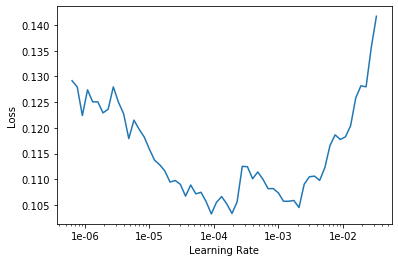

In [8]:
learn.recorder.plot()
